In [4]:
import h5py
import numpy as np
import pandas as pd
from psifr import fr
from cymr import fit
from cymr import models
from cymr import network
import importlib

data_file = '/Users/morton/Dropbox/work/cmr_cfr/cfr/benchmark.csv'
patterns_file = '/Users/morton/Dropbox/work/cmr_cfr/cfr/cfr_patterns.hdf5'

## Load and plot data

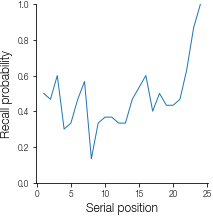

In [5]:
data = pd.read_csv(data_file)
merged = fr.merge_free_recall(data)
fr.plot_spc(fr.spc(merged))

## Test localist benchmark

In [6]:
# target: -1110.9
# new: -1100.8271552820725
patterns = network.load_patterns(patterns_file)
cmr = models.CMRDistributed()
param = {'B_enc': 0.79, 'B_rec': 0.94, 'w_loc': 1,
         'Afc': 0, 'Acf': 0, 'Aff': 0,
         'Dfc': 70.46, 'Dcf': 100, 'Dff': 2.5,
         'Lfc': 1, 'Lcf': 1, 'P1': 16.84, 'P2': 1.64,
         'T': 10, 'X1': 0.0093, 'X2': 0.32, 'B_start': 0.1}
weights = {'fcf': {'loc': 'w_loc'}}
cmr.likelihood(data, param, patterns=patterns, weights=weights)

(-1100.8271552820725, 373)

In [9]:
# likelihood by list (for debugging)
logl = np.zeros(30)
lists = data['list'].unique()
list_patterns = {'vector': {'loc': np.eye(24)}}
for i, listno in enumerate(lists):
    list1 = data.loc[data['list'] == listno].copy()
    study_index = list1.loc[list1['trial_type'] == 'study']['item_index']
    full_index = list1['item_index'].to_numpy()
    for j, idx in enumerate(study_index):
        list1.loc[full_index == idx, 'item_index'] = j
    cmr = models.CMRDistributed()
    ll, n = cmr.likelihood(list1, param, patterns=list_patterns, weights=weights)
    logl[i] = ll
logl

array([-59.14059126, -94.89316321, -25.67358416, -35.58386972,
       -50.07208933, -29.82464219, -17.48503924, -20.79516977,
       -26.03759877, -15.16431021, -33.01936546, -67.34216243,
       -35.3040444 , -30.31691792, -24.99815085, -32.5290064 ,
       -32.82336958, -27.37985824, -19.33660486, -35.95456378,
       -74.50064884, -94.0790228 , -77.99967756, -58.95685267,
       -58.09332813, -48.8254222 , -25.34584254, -55.22829858,
       -40.56980402, -49.87370193])

## Test semantic vectors

In [10]:
# -1183.6373719985013
param = {'B_enc': 0.79, 'B_rec': 0.94, 'w_w2v': 1,
         'Afc': 0, 'Acf': 0, 'Aff': 0,
         'Dfc': 70.46, 'Dcf': 100, 'Dff': 2.5,
         'Lfc': 1, 'Lcf': 1, 'P1': 16.84, 'P2': 1.64,
         'T': 10, 'X1': 0.0093, 'X2': 0.32, 'B_start': 0.1}
weights = {'fcf': {'w2v': 'w_w2v'}}
cmr.likelihood(data, param, patterns=patterns, weights=weights)

(-1183.6373719985013, 373)